Eval accuracy = 0.9000
Confusion Matrix:
[[42  8]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89        50
         1.0       0.86      0.96      0.91        50

    accuracy                           0.90       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100



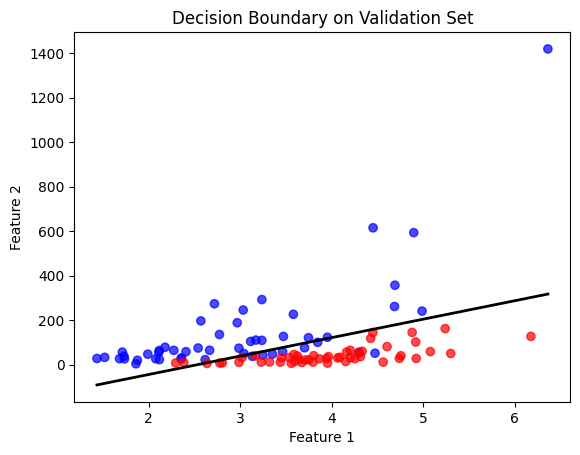

In [3]:
import numpy as np
import util

from linear_model import LinearModel
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

class LogisticRegression(LinearModel):
    @staticmethod
    def sigmoid(z):
        return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))

    @staticmethod
    def compute_htheta(X, theta):
        return LogisticRegression.sigmoid(np.dot(X, theta))

    @staticmethod
    def compute_grad(X,y,theta):
        m = X.shape[0]
        h = LogisticRegression.compute_htheta(X, theta)        # shape (m,)
        error = y - h                       # shape (m,)
        grad = -(X.T @ error) / m
        return grad 

    @staticmethod
    def compute_hessian(X,theta):
        hessian = np.zeros((X.shape[1], X.shape[1]))
        m = X.shape[0]
        h_theta = LogisticRegression.compute_htheta(X, theta)
        for i in range(m):
            hessian += h_theta[i] * (1 - h_theta[i]) * np.outer(X[i], X[i])
        hessian /= m
        return hessian

    def fit(self, x, y):
        # *** START CODE HERE ***
        theta = np.zeros(x.shape[1])
        
        max_iter = 1000
        for _ in range(max_iter):
            gradient_matrix = LogisticRegression.compute_grad(x, y, theta)
            hessian_matrix = LogisticRegression.compute_hessian(x, theta)

            delta  = np.linalg.solve(hessian_matrix, gradient_matrix)
            if np.linalg.norm(delta) < 1e-6:
                break
            theta -= delta
            
        self.theta = theta.copy()


        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        probs = LogisticRegression.compute_htheta(x, self.theta)
        return (probs >= 0.5).astype(int)
        # *** END CODE HERE ***

def main(train_path, eval_path, pred_path):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    x_eval,  y_eval  = util.load_dataset(eval_path, add_intercept=True)

    # *** START CODE HERE ***
    clf = LogisticRegression()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_eval)

    np.savetxt(pred_path, y_pred, fmt="%d")

    acc = np.mean(y_pred == y_eval)
    print(f"Eval accuracy = {acc:.4f}")

    print("Confusion Matrix:")
    print(confusion_matrix(y_eval, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_eval, y_pred))

    w0, w1, w2 = clf.theta

    x1_vals = np.linspace(min(x_eval[:, 1]), max(x_eval[:, 1]), 100)
    x2_vals = -(w0 + w1 * x1_vals) / w2

    plt.scatter(x_eval[:, 1], x_eval[:, 2], c=y_eval, cmap="bwr", alpha=0.7)
    plt.plot(x1_vals, x2_vals, color="k", linewidth=2)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary on Validation Set")
    plt.show()

    # *** END CODE HERE ***
if __name__ == "__main__":
    import sys
    main("./data/ds1_train.csv", "./data/ds1_valid.csv", "./data/ds1_pred.csv")
    